In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv(r"C:/Users/Dileemre/Desktop/jupyter/DATAAITEAM/train.csv")

targets_np = train.label.values
features_np = train.loc[:,train.columns != "label"].values/255

features_train, features_test, targets_train, targets_test = train_test_split(features_np,
                                                                             targets_np,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

x_train = torch.from_numpy(features_train)
y_train = torch.from_numpy(targets_train).type(torch.LongTensor)

x_test = torch.from_numpy(features_test)
y_test = torch.from_numpy(targets_test).type(torch.LongTensor)

batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

In [22]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        #Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        #Non-linearity 1
        self.relu1 = nn.ReLU()
        
        #Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        #Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        #Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        #Non-linearity 3
        self.elu3 = nn.ELU()
        
        #Linear function 4: 150 --> 150
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.tanh2(out)

        out = self.fc3(out)
        out = self.elu3(out)

        out = self.fc4(out)
        return out

In [27]:
input_dim = 28*28
hidden_dim = 150
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [28]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28)).float()
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        
        count += 1
        if count % 50 == 0:
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28)).float()
                outputs = model(test)
                predicted = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
            if count % 500 == 0:
                print("Iteration: {} Loss: {} Acc {}%".format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.7711266875267029 Acc 80.60713958740234%
Iteration: 1000 Loss: 0.44053417444229126 Acc 87.98809814453125%
Iteration: 1500 Loss: 0.22609205543994904 Acc 89.75%
Iteration: 2000 Loss: 0.2981734871864319 Acc 90.75%
Iteration: 2500 Loss: 0.3087805211544037 Acc 92.08333587646484%
Iteration: 3000 Loss: 0.11589017510414124 Acc 92.82142639160156%
Iteration: 3500 Loss: 0.2433844804763794 Acc 93.55952453613281%
Iteration: 4000 Loss: 0.0644514337182045 Acc 94.0%
Iteration: 4500 Loss: 0.31151440739631653 Acc 94.51190185546875%
Iteration: 5000 Loss: 0.09208793938159943 Acc 94.79762268066406%
Iteration: 5500 Loss: 0.1876504123210907 Acc 94.82142639160156%
Iteration: 6000 Loss: 0.1984429806470871 Acc 95.16666412353516%
Iteration: 6500 Loss: 0.09840219467878342 Acc 95.51190185546875%
Iteration: 7000 Loss: 0.1106371283531189 Acc 95.85713958740234%
Iteration: 7500 Loss: 0.13792917132377625 Acc 95.8452377319336%
Iteration: 8000 Loss: 0.17257045209407806 Acc 95.89286041259766%
Iterati

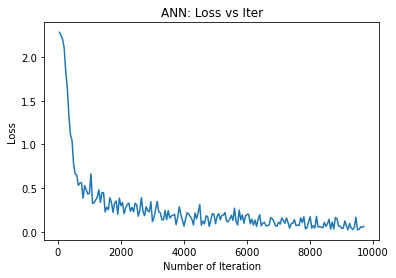

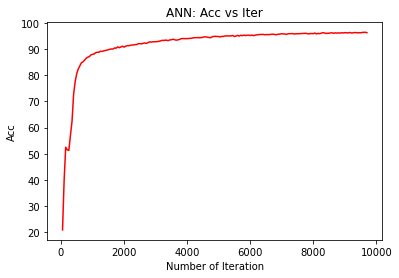

In [29]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Iter")
plt.show()

plt.plot(iteration_list, accuracy_list, color = "red")
plt.xlabel("Number of Iteration")
plt.ylabel("Acc")
plt.title("ANN: Acc vs Iter")
plt.show()